In [9]:
import pandas as pd
import requests
from io import StringIO
from bs4 import BeautifulSoup
import re
import matplotlib.pyplot as plt


In [10]:
# Function to fetch CSV file URLs from a GitHub repository
def get_csv_files_from_repo(api_url):
    response = requests.get(api_url)
    if response.status_code == 200:
        files = response.json()
        csv_files = {
            file['name']: file['download_url']
            for file in files
            if file['name'].endswith('.csv') and 'download_url' in file
        }
        return csv_files
    else:
        raise ValueError(f"Failed to fetch repository contents: {response.status_code}")

# Function to read a CSV file from a URL into a DataFrame
def read_csv_from_url(url):
    response = requests.get(url)
    response.raise_for_status()  # Raise an error for bad status codes
    return pd.read_csv(StringIO(response.text))

# GitHub API endpoint for the repository contents
api_url = "https://api.github.com/repos/cshuler/Hydro_Monitoring_Network_ASPA-UH/contents/Scripts/Liza_Aimee_Workspace/Data"

# Get the list of CSV files
csv_files = get_csv_files_from_repo(api_url)

# Check if the list of CSV files is populated
if not csv_files:
    raise ValueError("No CSV files found in the repository")

# Dictionary to store DataFrames with full file names as keys
dataframes = {}

# Read each CSV file and store in the dictionary
for file_name, url in csv_files.items():
    try:
        # Sanitize the file name to use as a key (remove special characters)
        sanitized_name = re.sub(r'\W+', '_', file_name.split('.')[0])
        df = read_csv_from_url(url)
        dataframes[sanitized_name] = df
    except Exception as e:
        print(f"Error reading {file_name}: {e}")

/var/folders/ft/rj1gvr1d3q7b_prdsnsxp8y40000gn/T/ipykernel_73064/1418163059.py:19: DtypeWarning: Columns (1,2,3,4,5,6,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(StringIO(response.text))
/var/folders/ft/rj1gvr1d3q7b_prdsnsxp8y40000gn/T/ipykernel_73064/1418163059.py:19: DtypeWarning: Columns (1,2,3,4,5,6,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(StringIO(response.text))
/var/folders/ft/rj1gvr1d3q7b_prdsnsxp8y40000gn/T/ipykernel_73064/1418163059.py:19: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,12) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(StringIO(response.text))
/var/folders/ft/rj1gvr1d3q7b_prdsnsxp8y40000gn/T/ipykernel_73064/1418163059.py:19: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(StringIO(response.text))


In [11]:
# Print all DataFrame names and their first few rows
for name, df in dataframes.items():
    print(f"DataFrame for {name}:")
    print(df.head())

DataFrame for Aasu_ALL_15min_data:
       TIMESTAMP RECORD BattV_Avg PTemp_C_Max AirTF_Avg    RH Rain_in_Tot  \
0             TS     RN     Volts       Deg C     Deg F     %        inch   
1            NaN    NaN       Avg         Max       Avg   Smp         Tot   
2  4/25/17 19:30      0     12.87        28.3      77.1  92.8        1.62   
3  4/25/17 19:45      1     12.91       26.65     77.17  92.1           0   
4  4/25/17 20:00      2     12.91       24.76     77.44  92.7           0   

  WS_mph_S_WVT WindDir_D1_WVT WindDir_SD1_WVT SlrW_Avg SlrMJ_Tot  
0   miles/hour            Deg             Deg    W/m^2    MJ/m^2  
1          WVc            WVc             WVc      Avg       Tot  
2        1.549          77.27           17.53     0.13  5.46E-05  
3        2.522           80.7           16.43    0.075  6.71E-05  
4        2.908          78.61           14.69    0.058  5.25E-05  
DataFrame for Aasu_Bad_data:
   Aasu_ALL_15min_data      Unnamed: 1    Unnamed: 2     Unnamed: 3  \


Analyzing DataFrame: Aasu_ALL_15min_data


/var/folders/ft/rj1gvr1d3q7b_prdsnsxp8y40000gn/T/ipykernel_73064/1479029792.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = pd.to_numeric(df[column], errors='coerce')


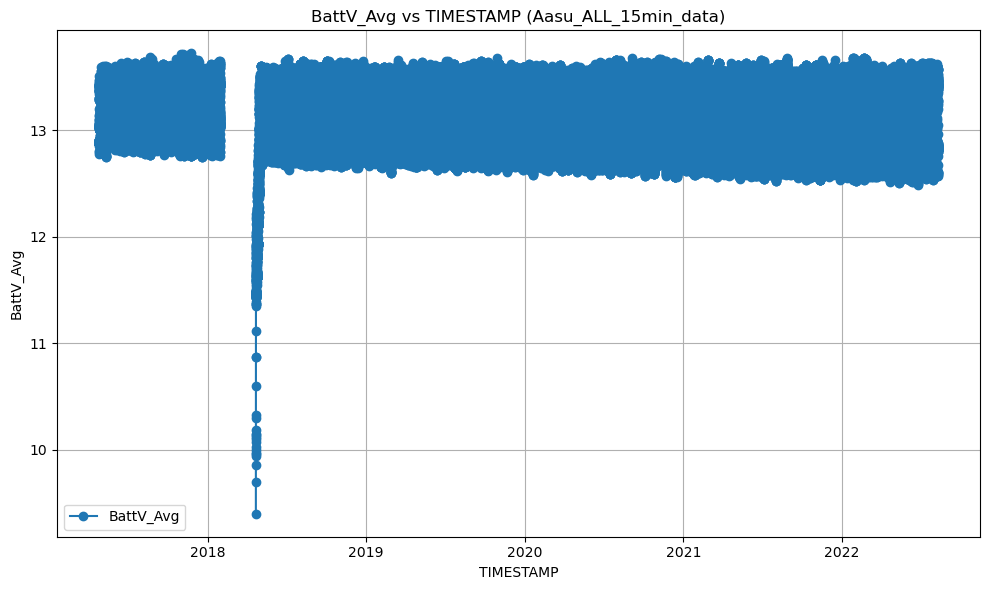

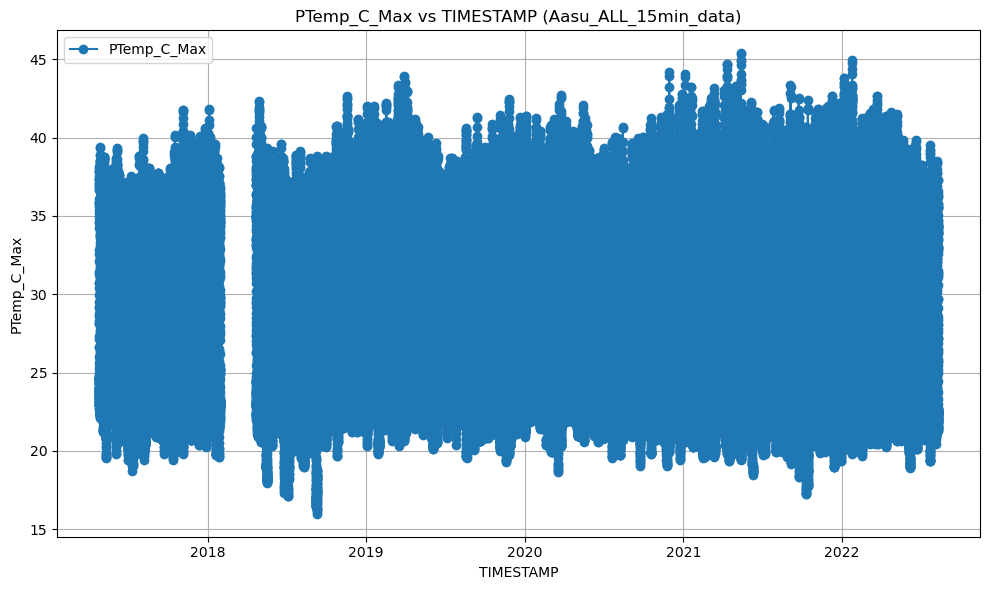

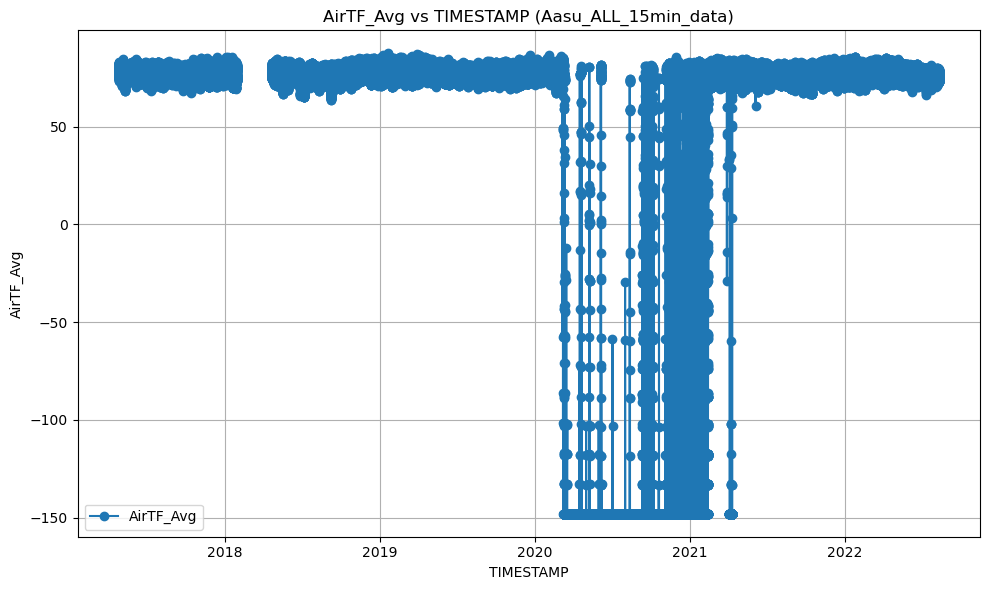

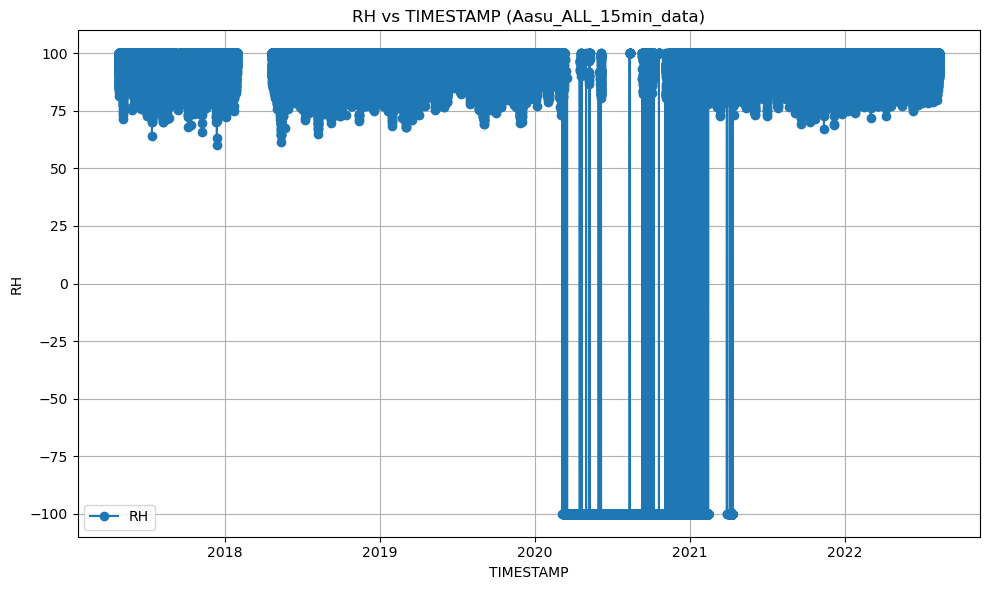

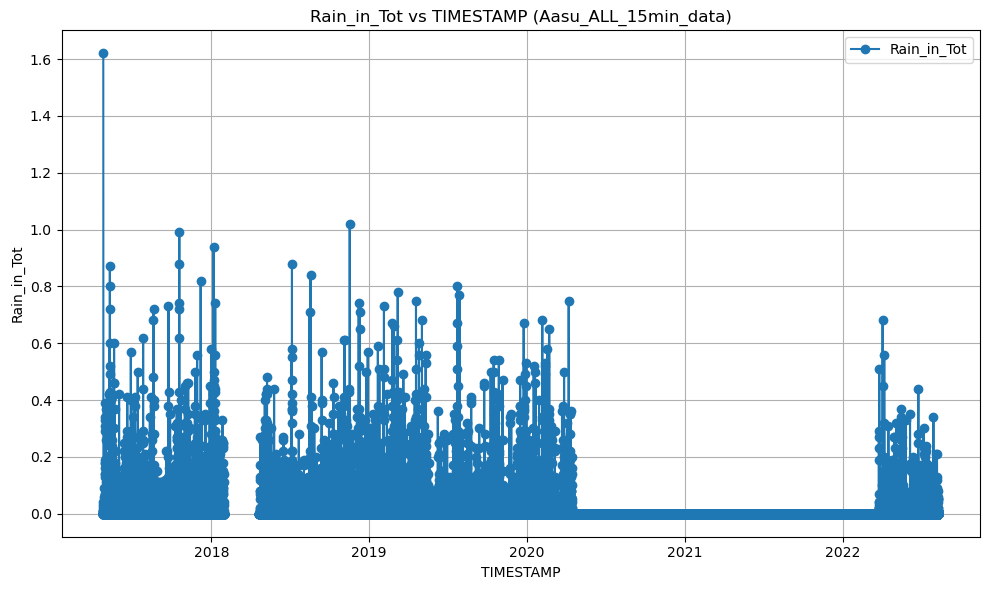

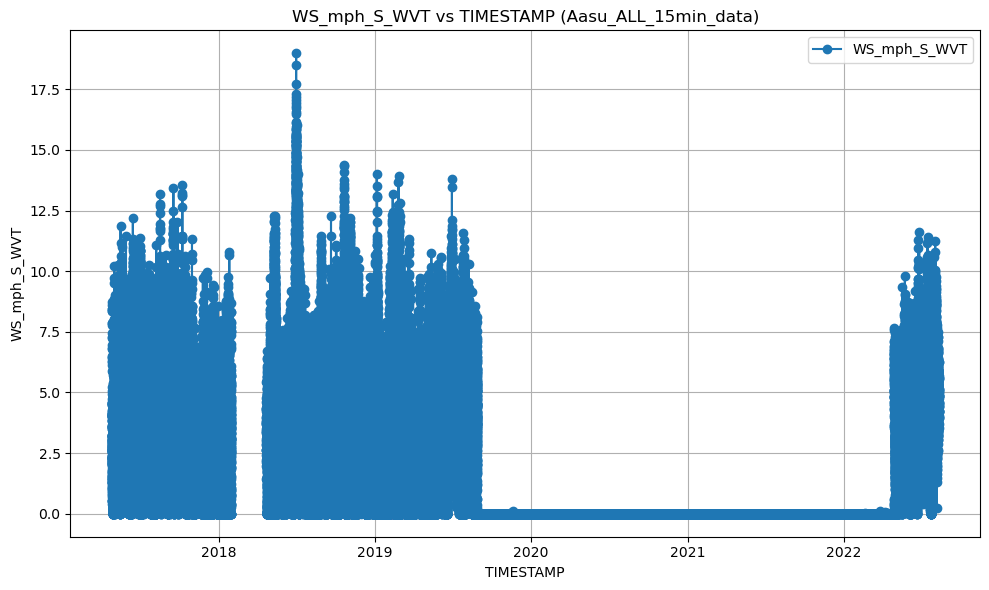

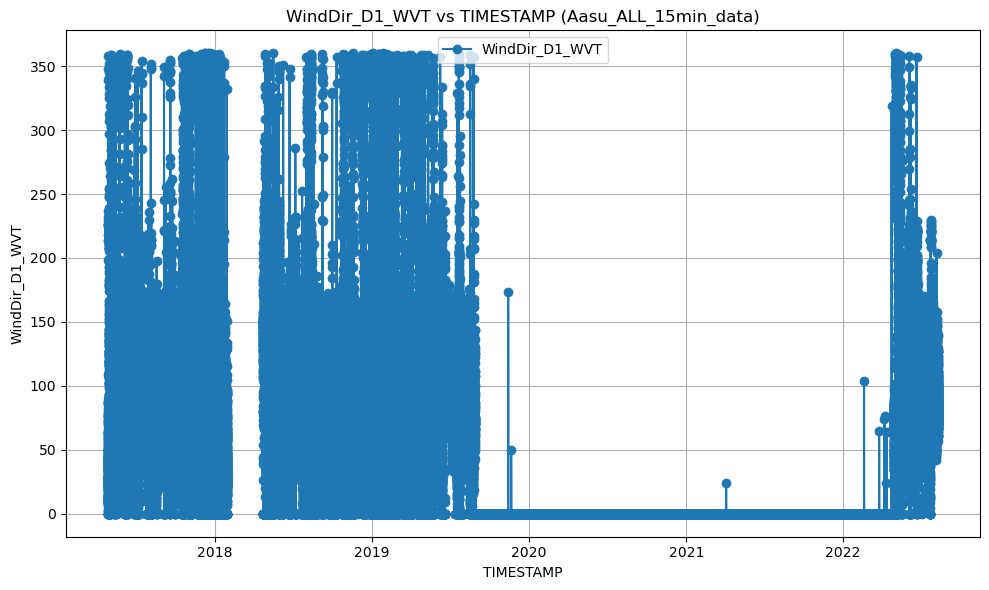

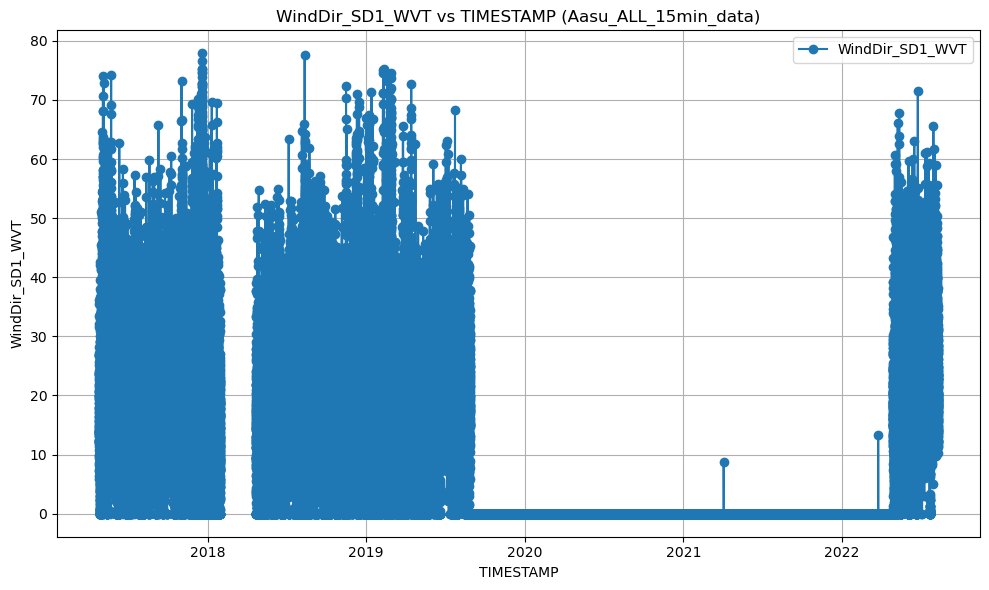

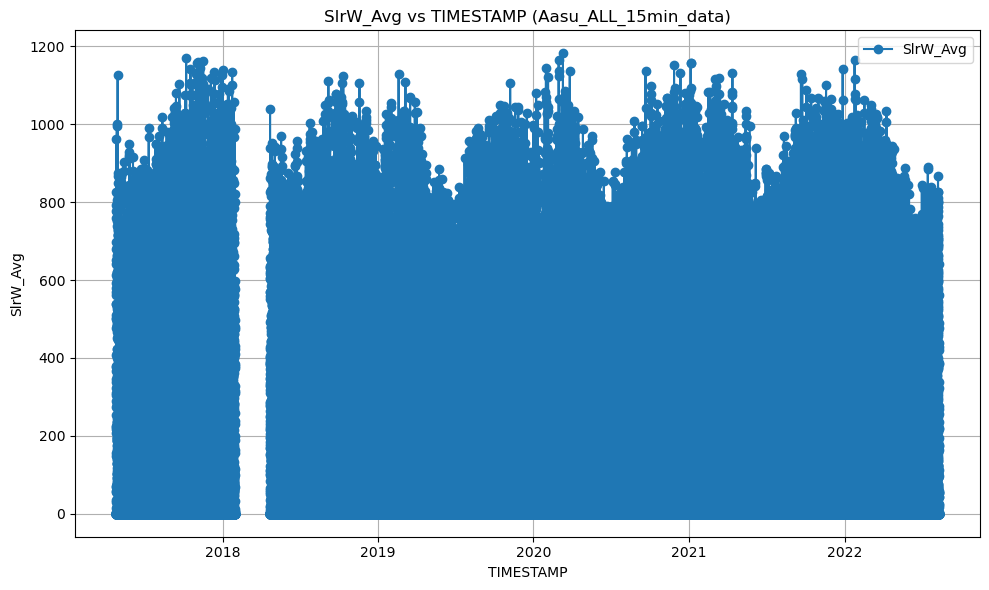

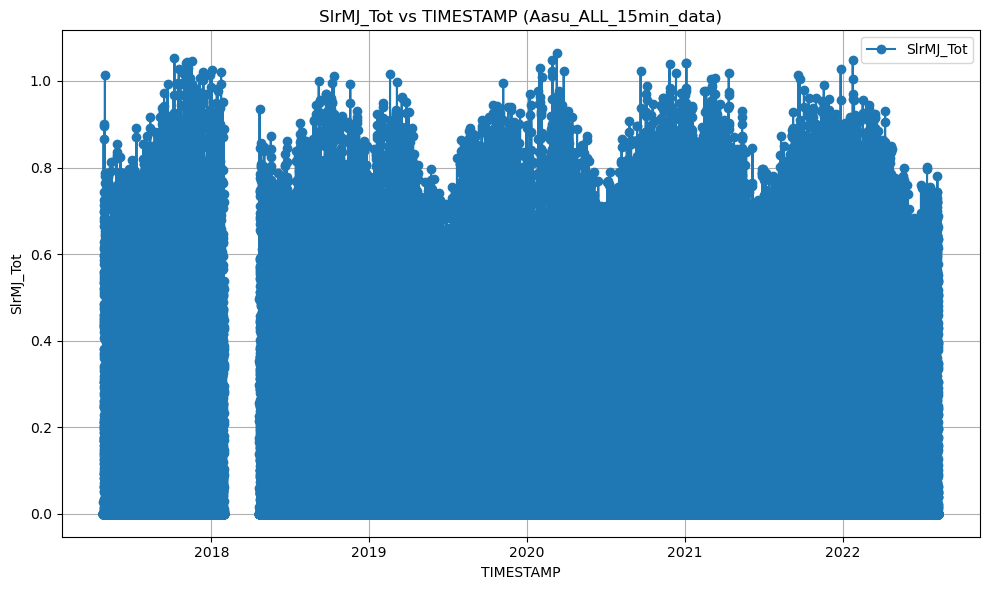

Analyzing DataFrame: Afono_ALL_15min_data


/var/folders/ft/rj1gvr1d3q7b_prdsnsxp8y40000gn/T/ipykernel_73064/1479029792.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = pd.to_numeric(df[column], errors='coerce')


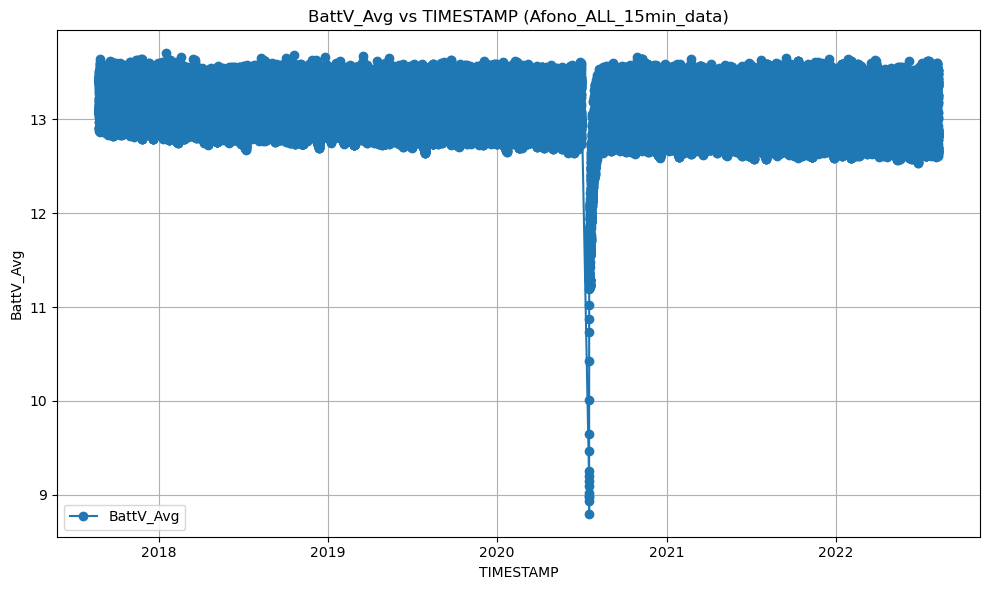

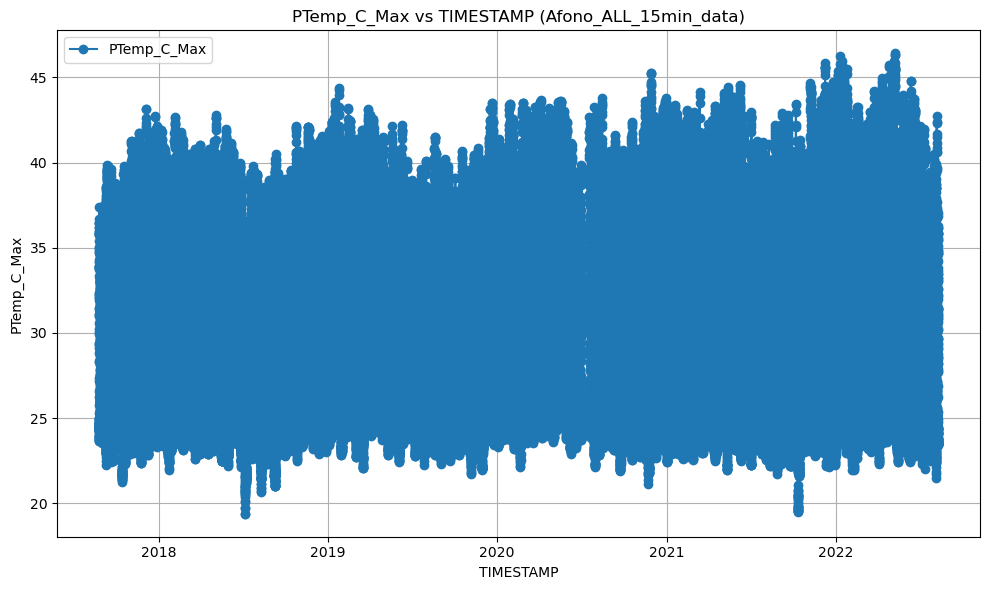

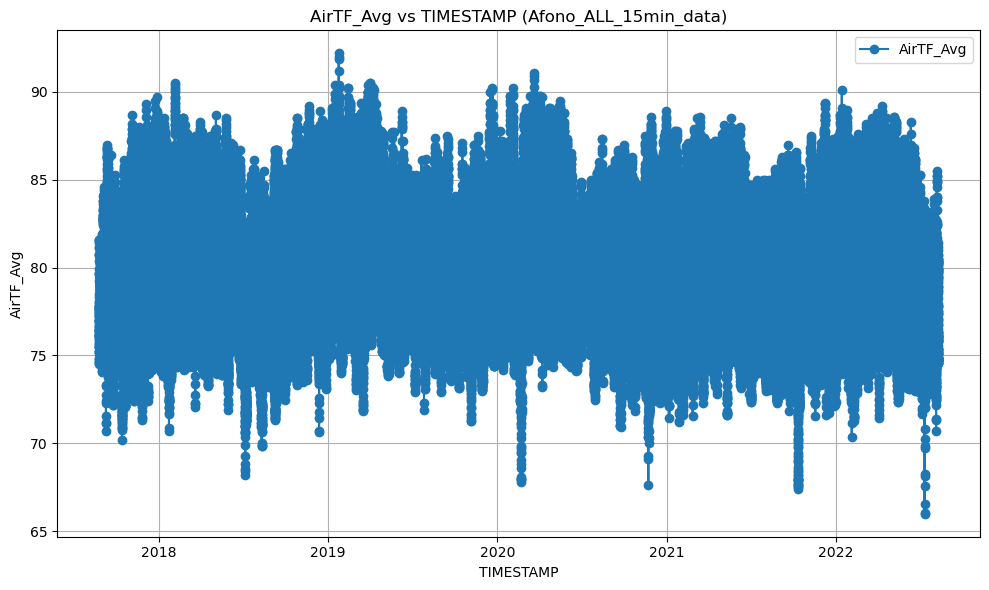

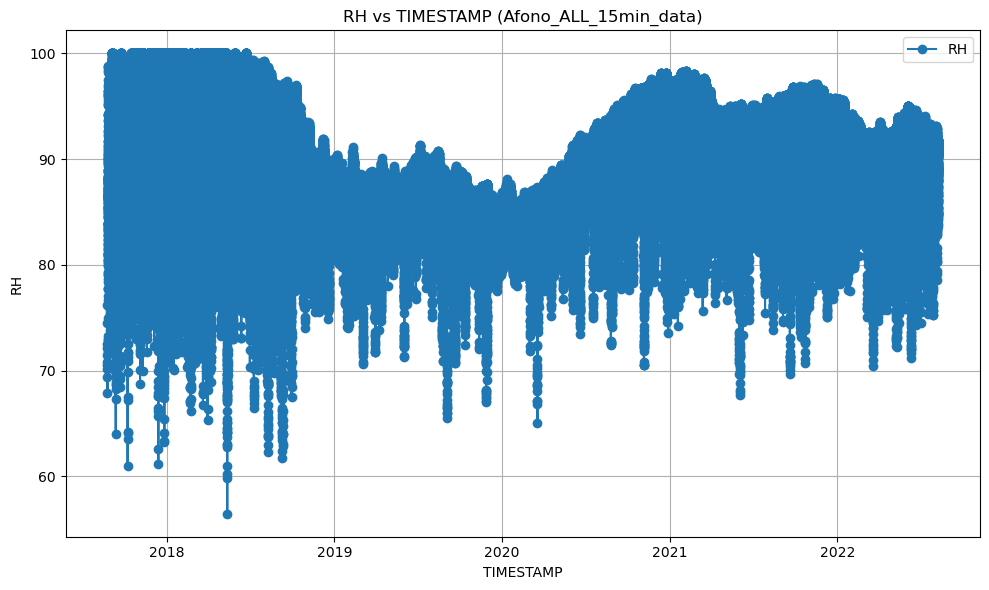

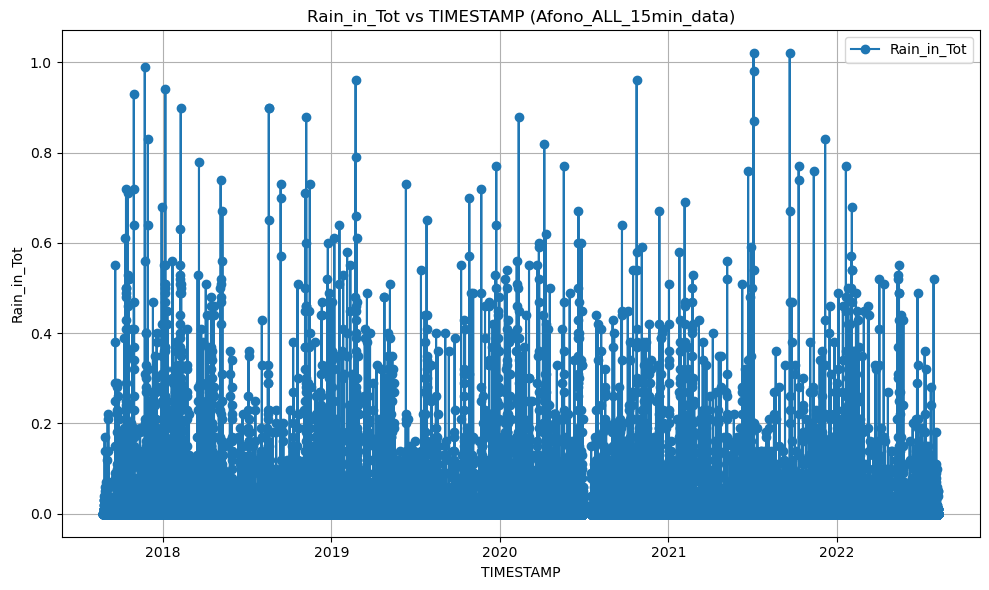

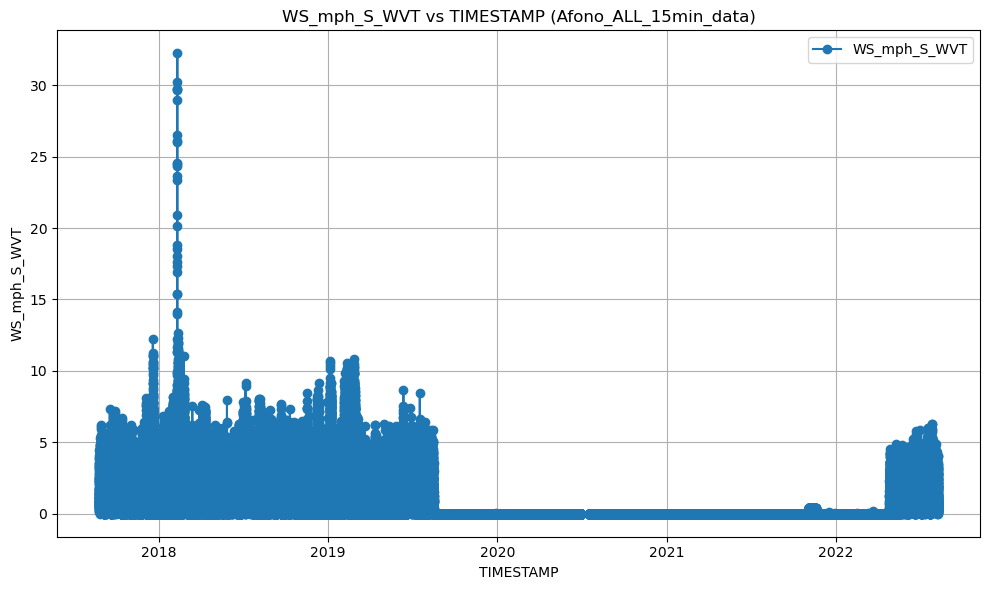

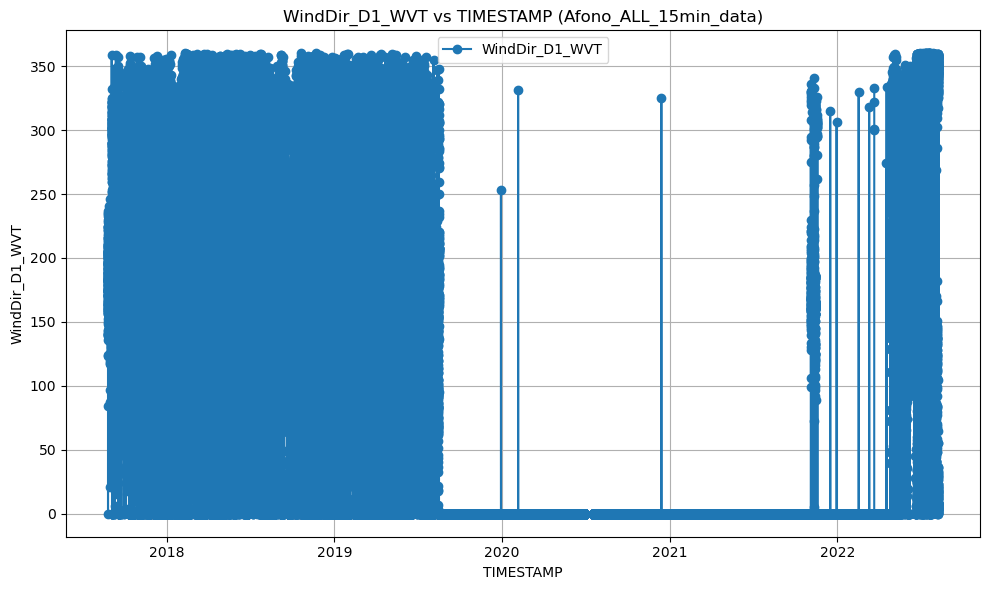

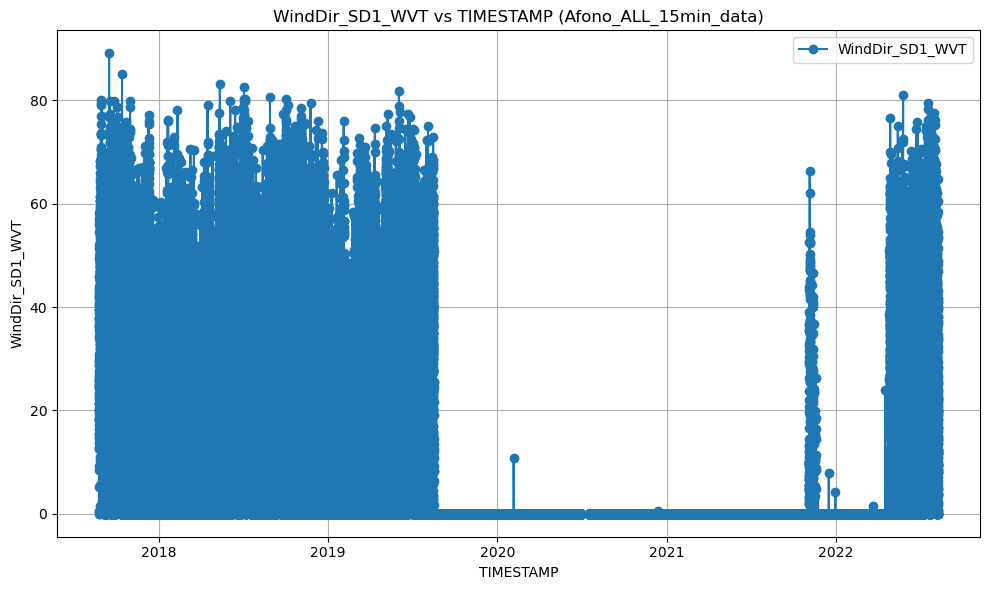

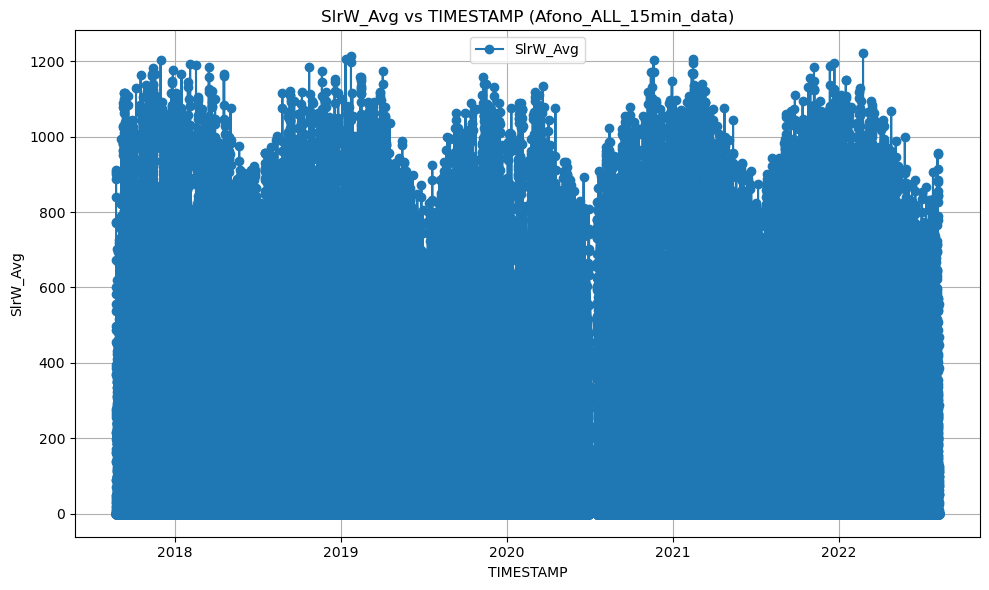

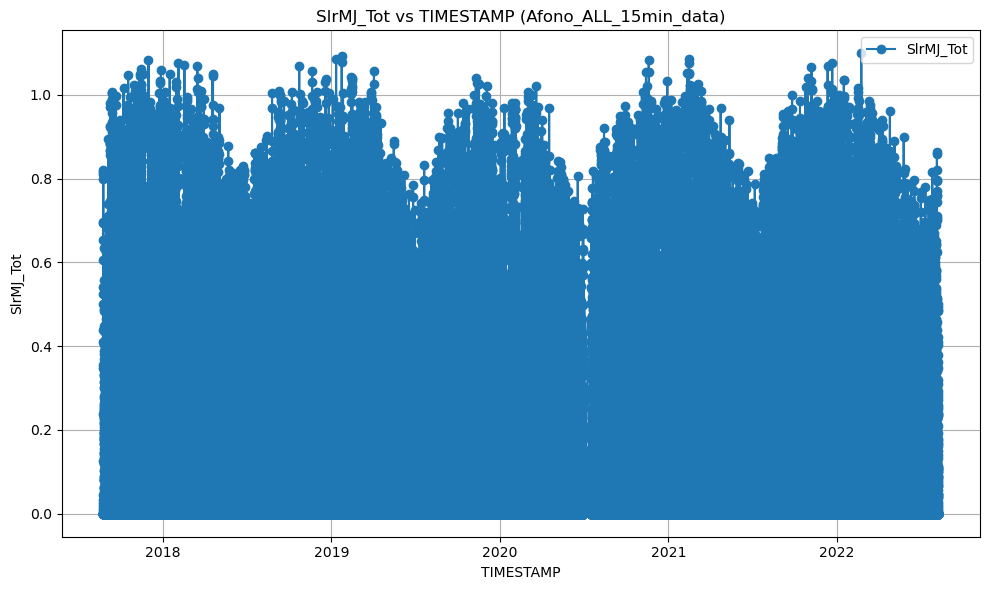

Analyzing DataFrame: Poloa_ALL_15min_data


/var/folders/ft/rj1gvr1d3q7b_prdsnsxp8y40000gn/T/ipykernel_73064/1479029792.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = pd.to_numeric(df[column], errors='coerce')


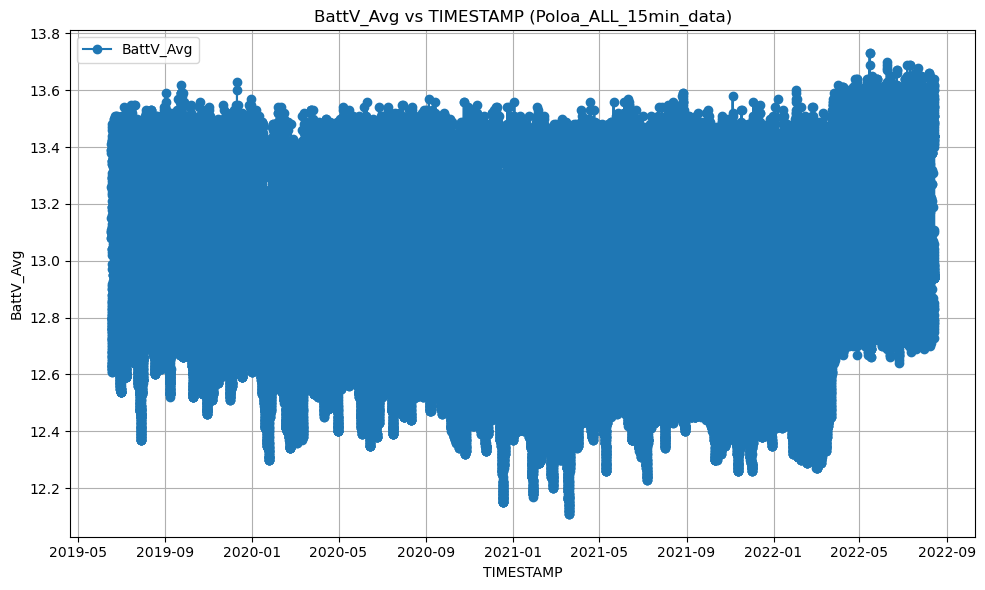

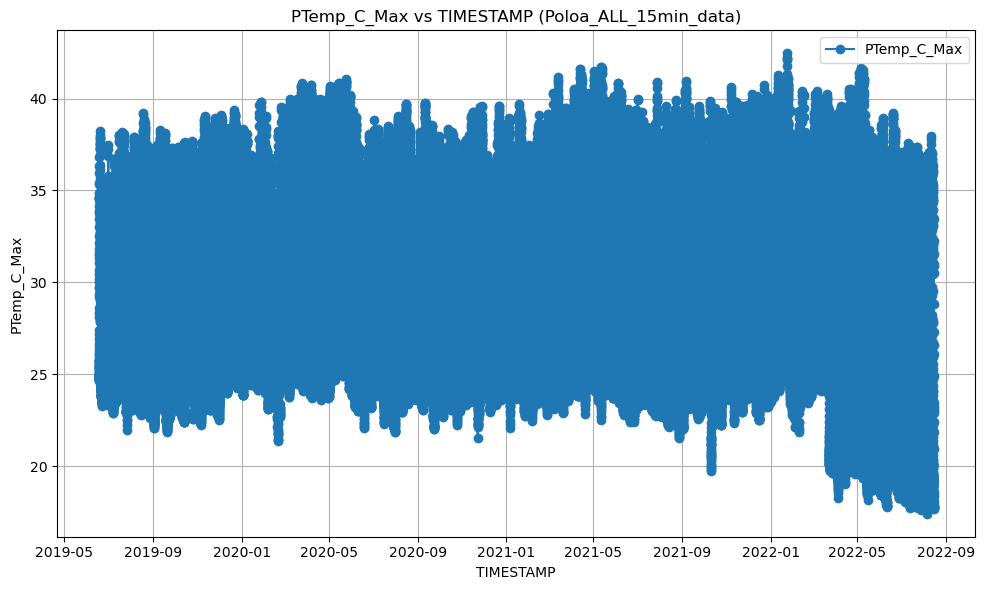

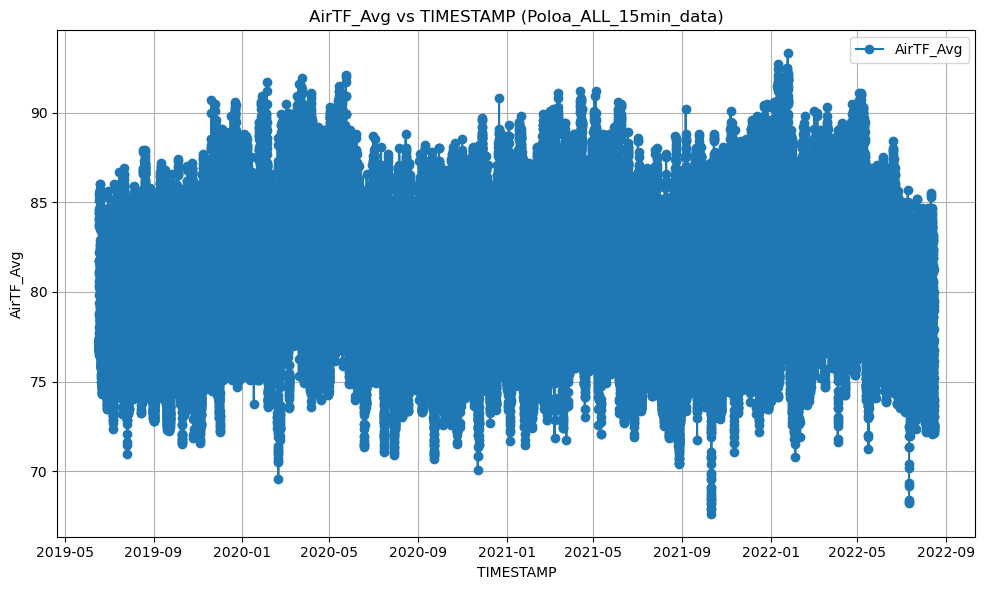

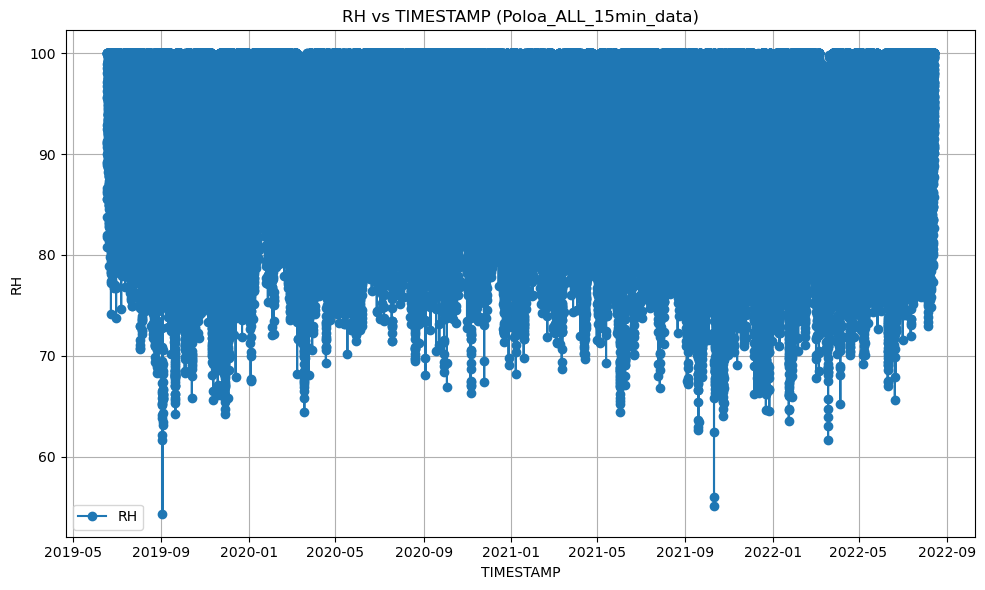

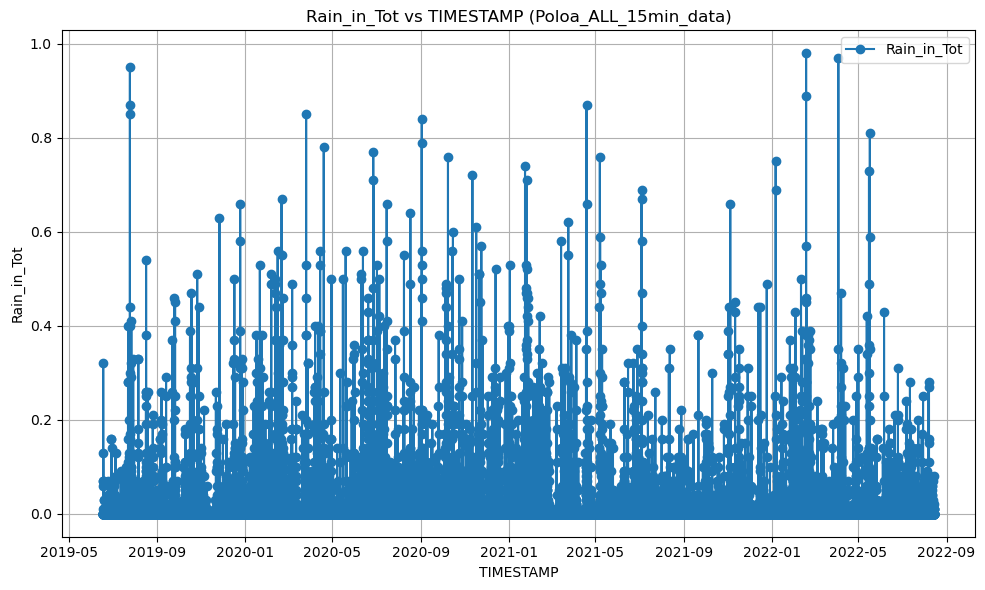

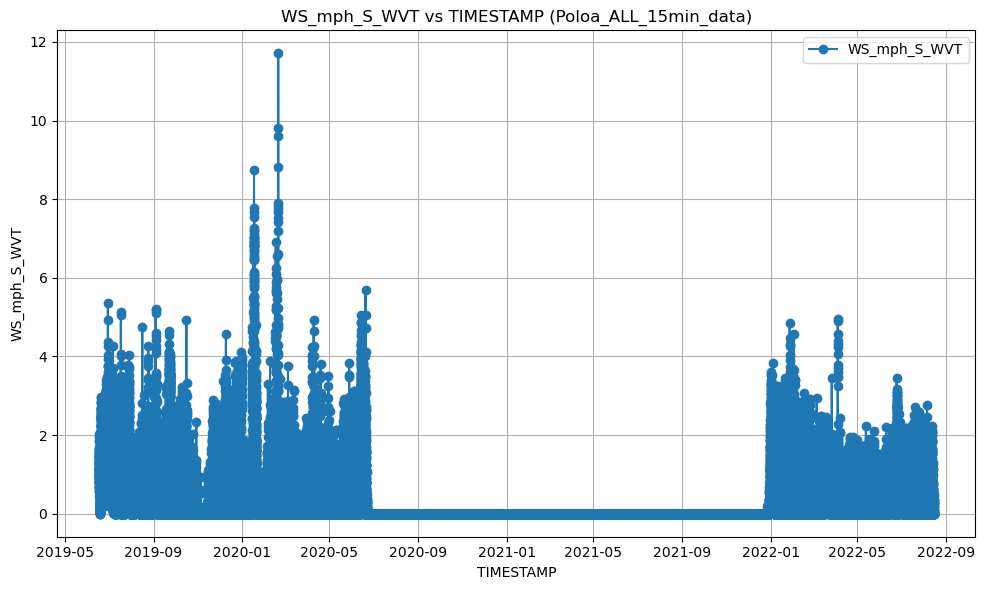

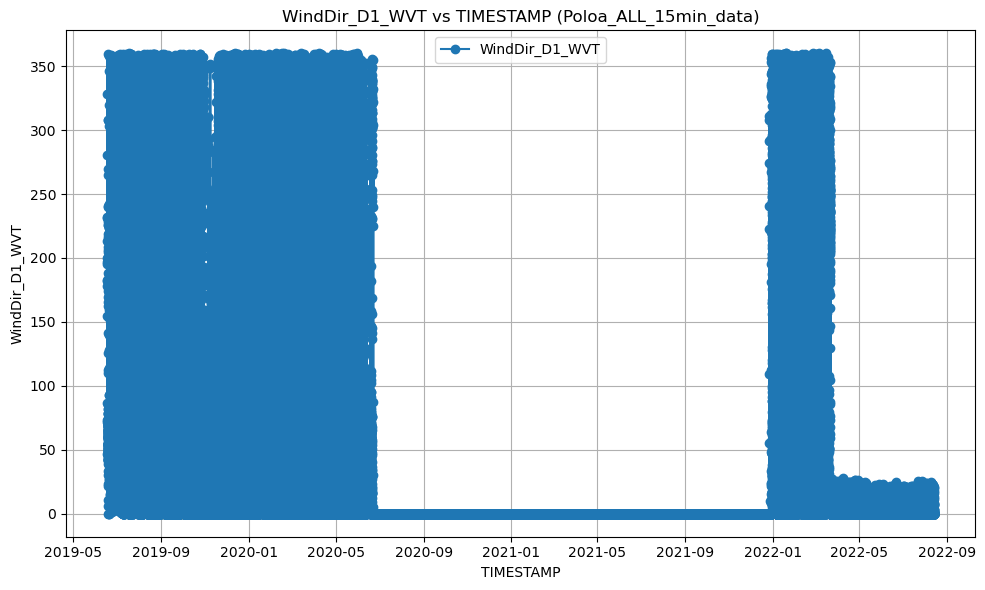

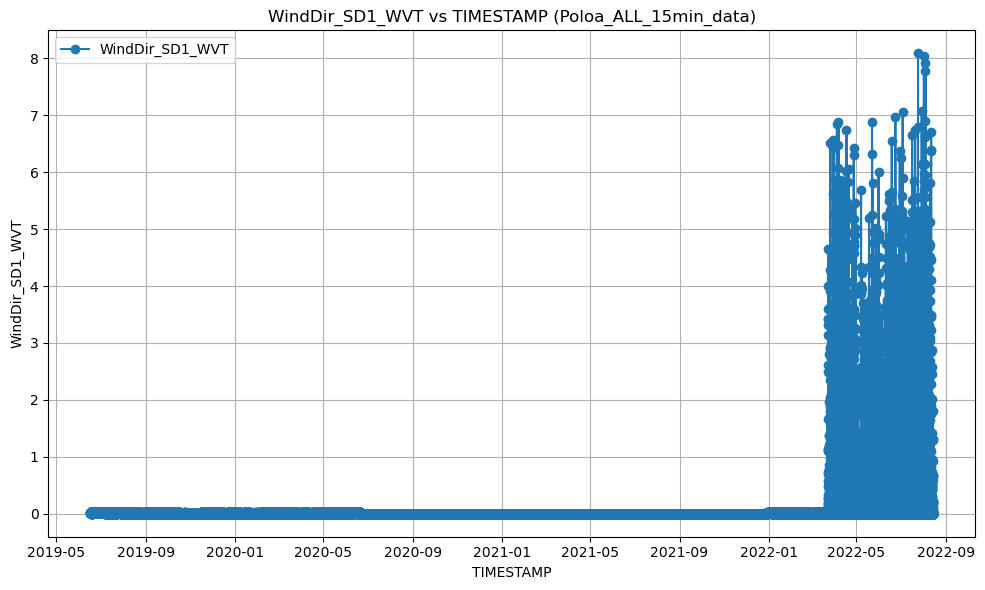

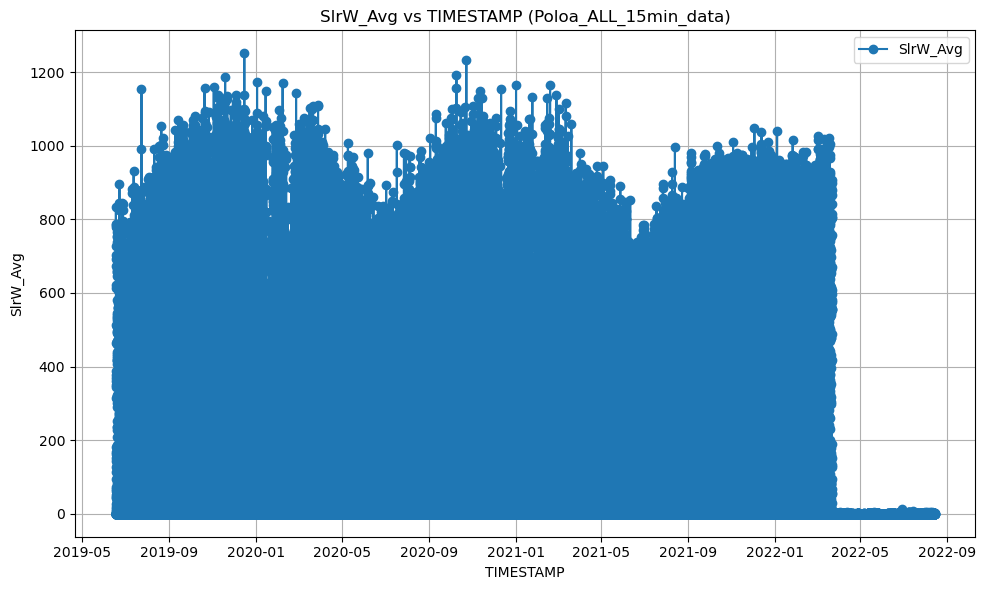

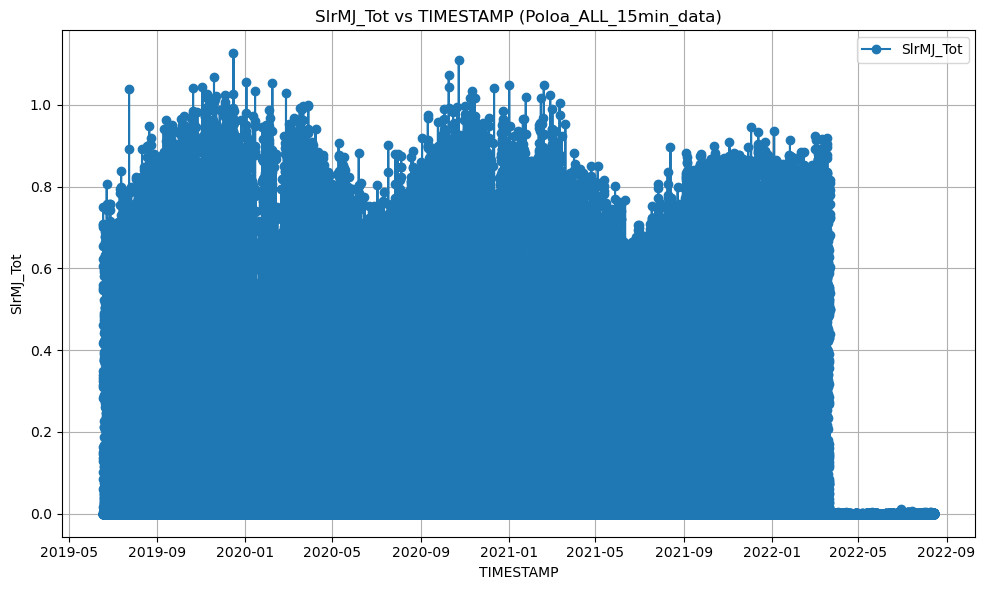

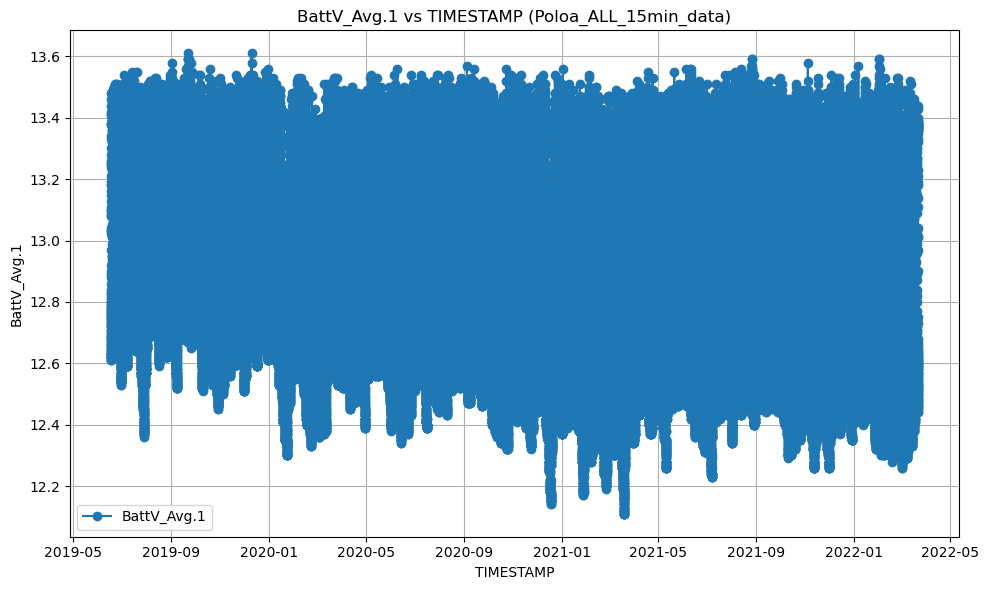

Analyzing DataFrame: Vaipito_ALL_15min_data


/var/folders/ft/rj1gvr1d3q7b_prdsnsxp8y40000gn/T/ipykernel_73064/1479029792.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = pd.to_numeric(df[column], errors='coerce')


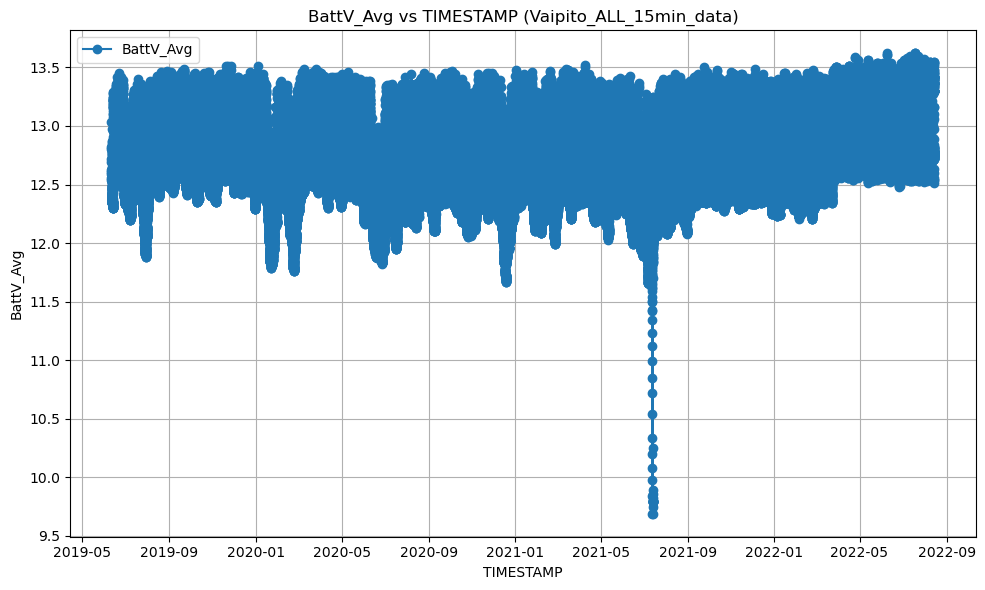

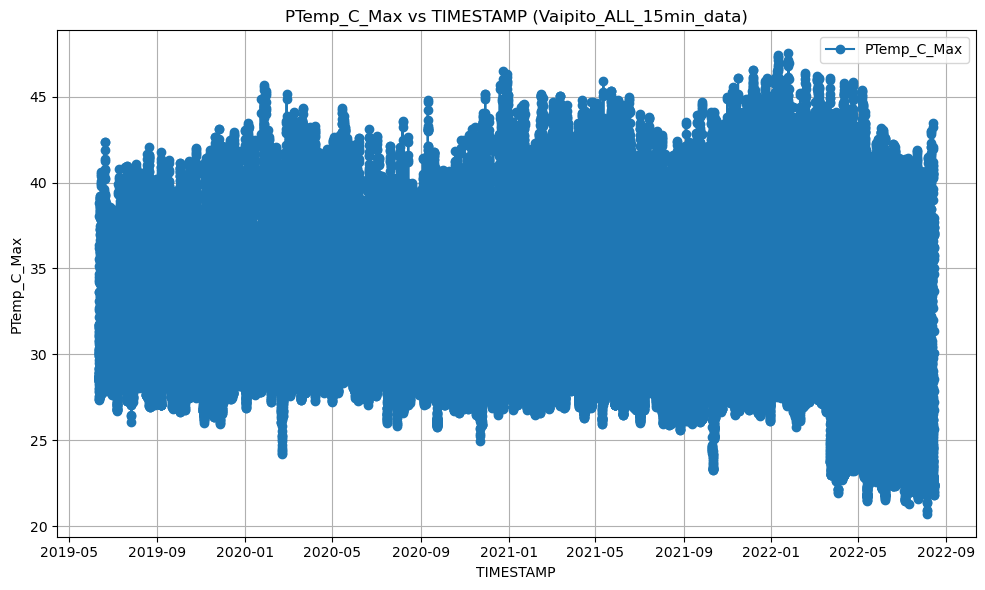

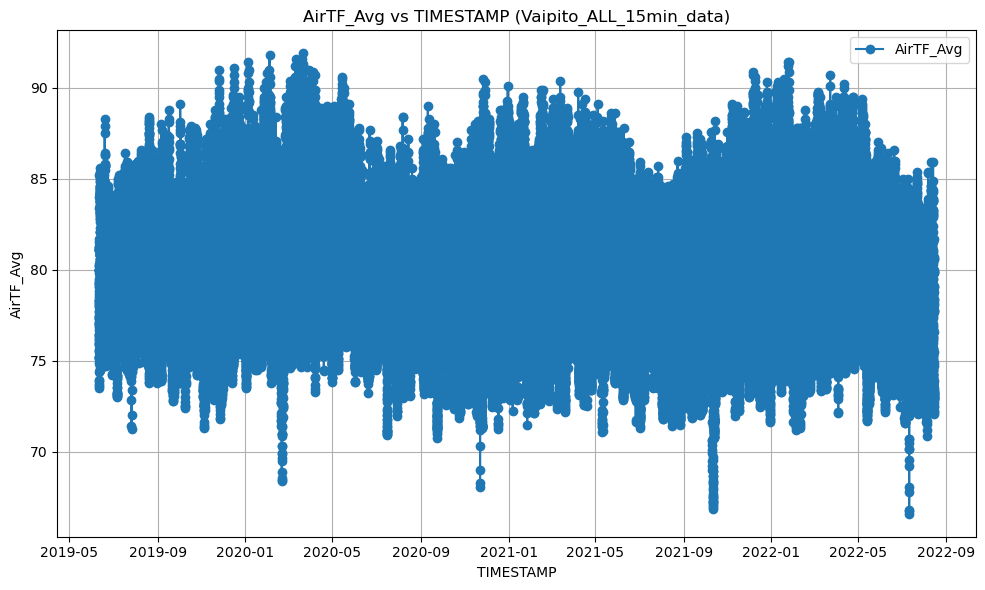

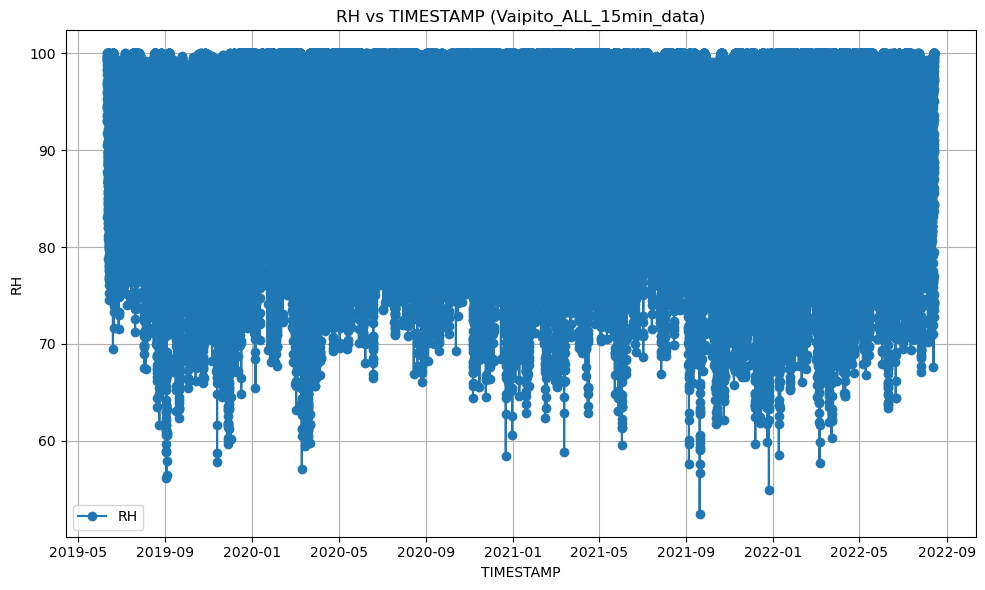

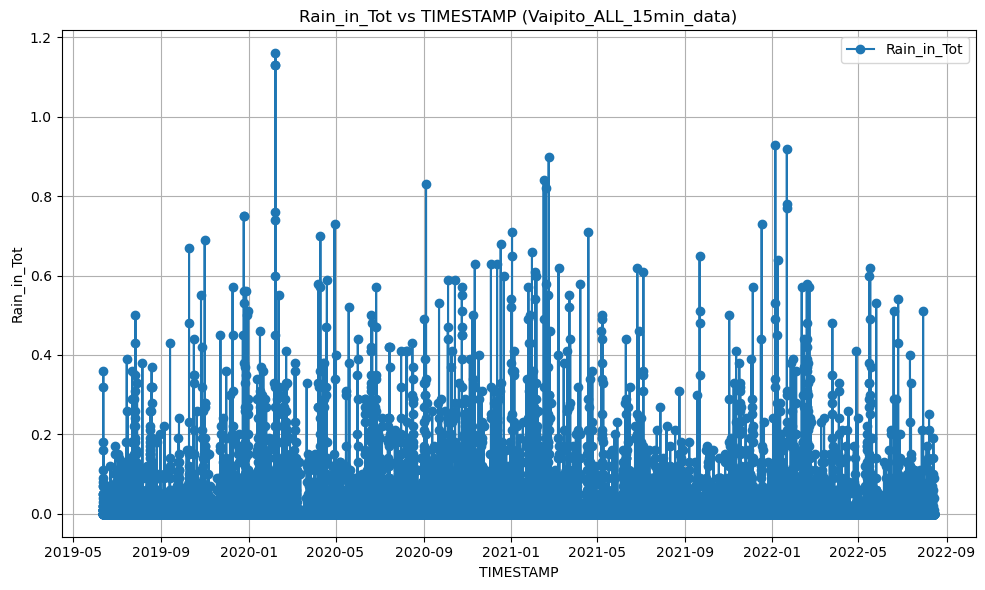

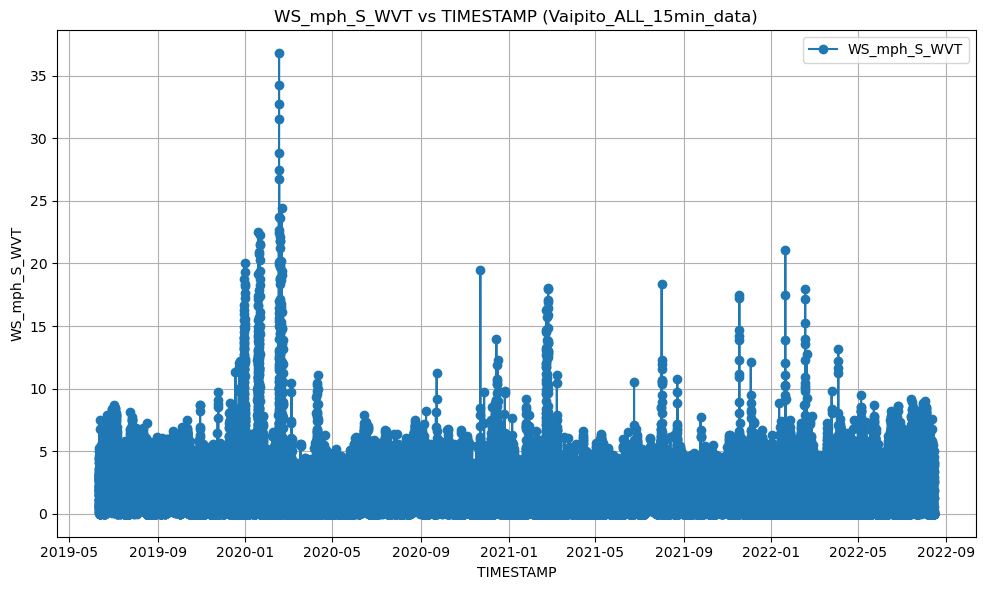

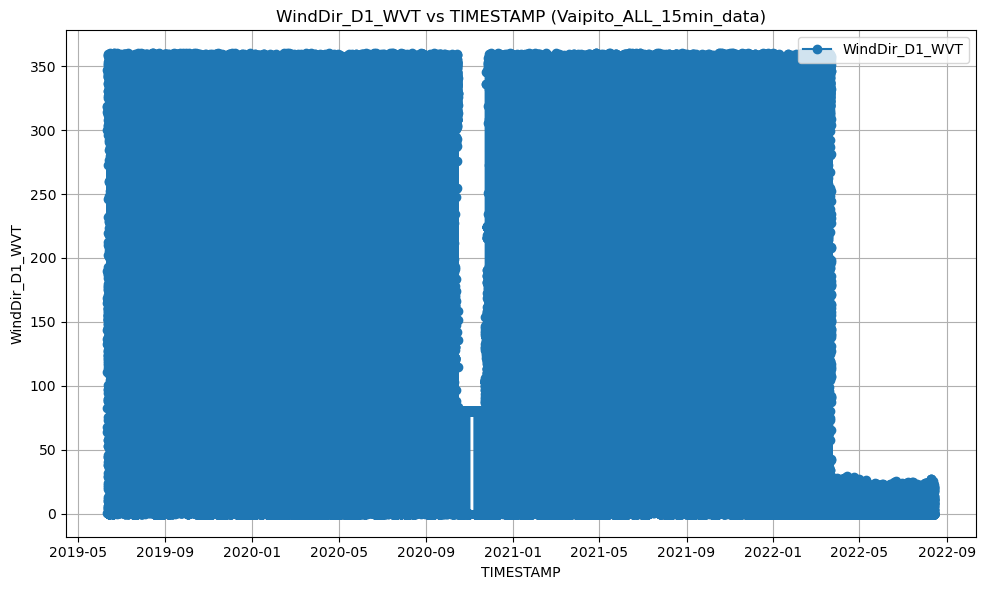

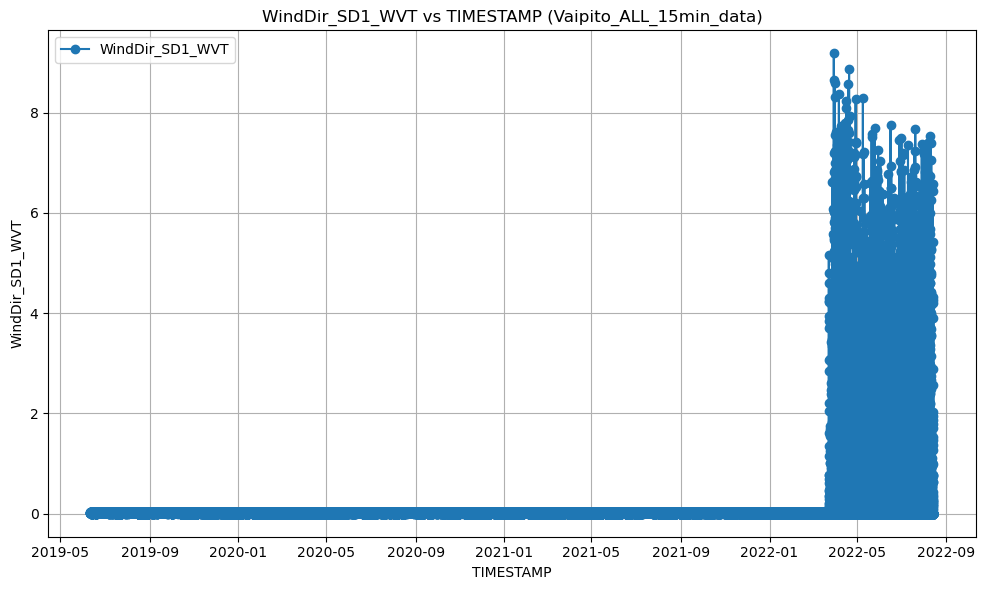

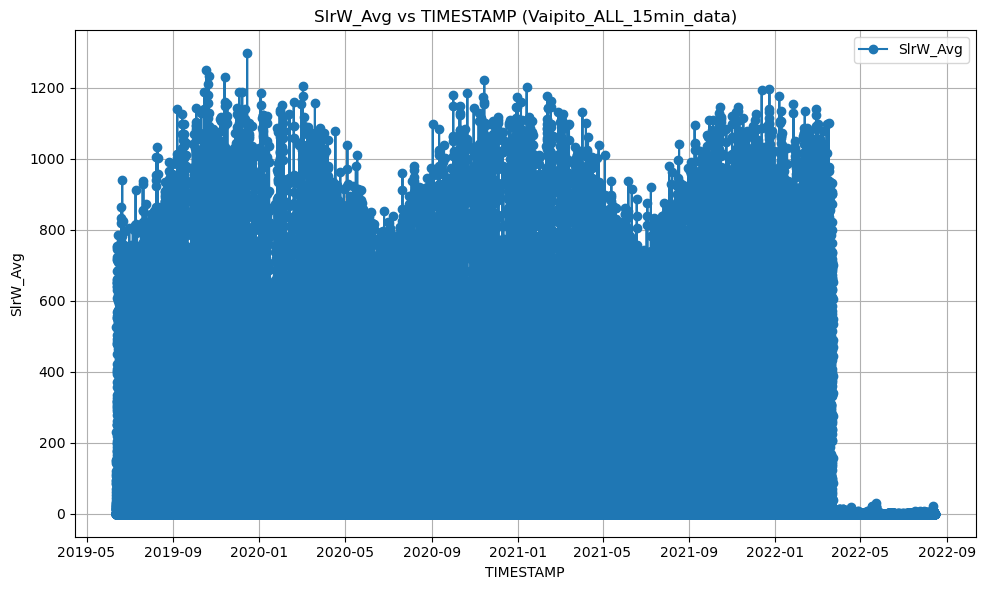

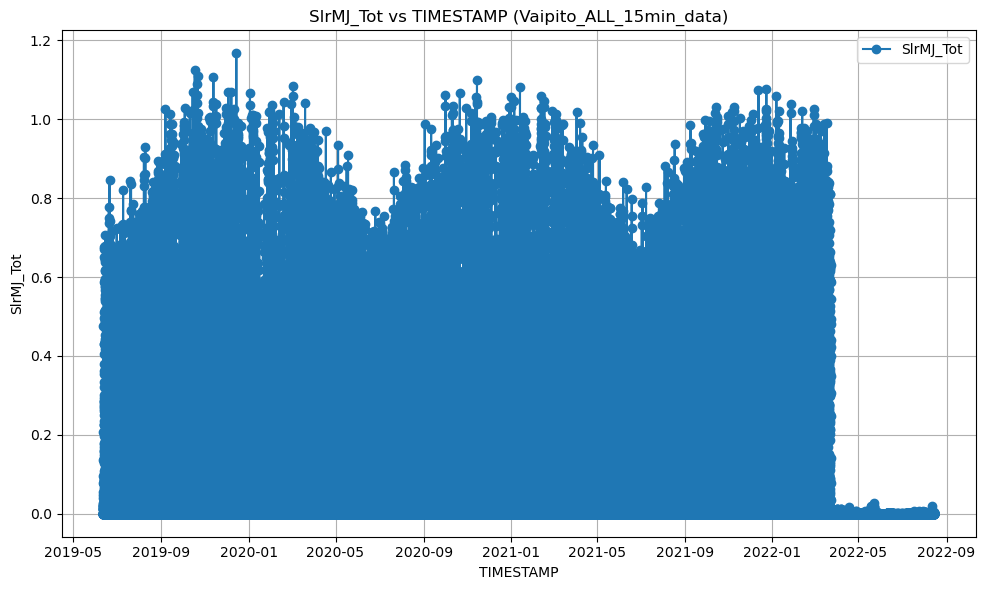

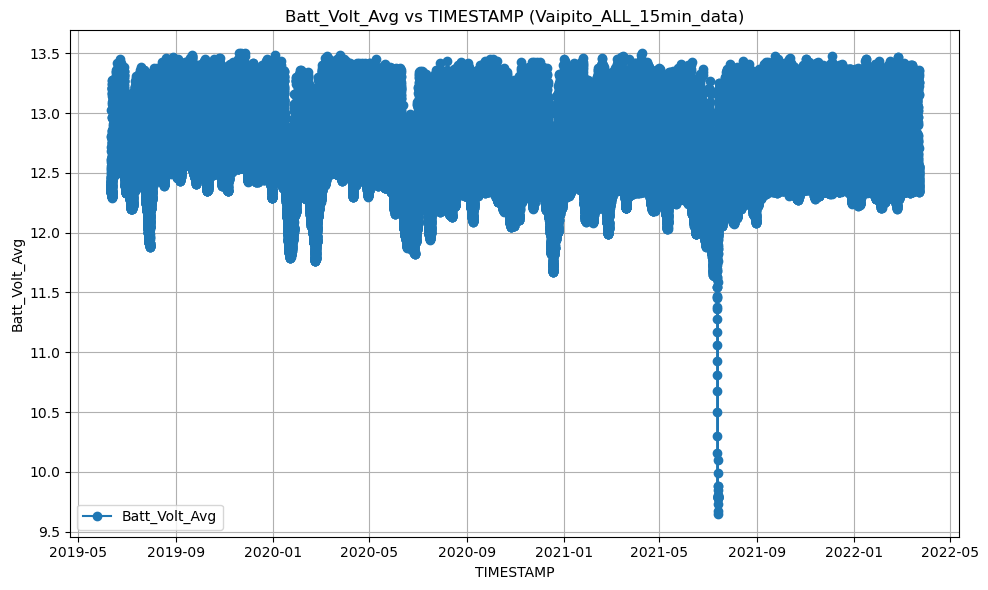

In [12]:
def exploratory_data_analysis(dataframes):
    for name, df in dataframes.items():
        # Filter DataFrames whose keys contain 'ALL'
        if 'ALL' in name.upper():
            print(f"Analyzing DataFrame: {name}")
            
            # Ensure TIMESTAMP exists and convert to datetime
            if 'TIMESTAMP' not in df.columns:
                print(f"Skipping {name}: 'TIMESTAMP' column not found")
                continue
            
            # Convert TIMESTAMP to datetime
            try:
                df['TIMESTAMP'] = pd.to_datetime(df['TIMESTAMP'], errors='coerce')
                df = df.dropna(subset=['TIMESTAMP'])
            except Exception as e:
                print(f"Error processing TIMESTAMP for {name}: {e}")
                continue
            
            # Convert all columns to numeric where possible (exclude TIMESTAMP)
            for column in df.columns:
                if column != 'TIMESTAMP':
                    try:
                        df[column] = pd.to_numeric(df[column], errors='coerce')
                    except Exception as e:
                        print(f"Error converting {column} in {name} to numeric: {e}")
            
            # Exclude columns that are non-numeric or explicitly unwanted
            excluded_columns = ['RECORD']
            numeric_columns = [col for col in df.columns if col not in excluded_columns and col != 'TIMESTAMP']
            
            # Check if any valid numeric columns exist
            if not numeric_columns:
                print(f"No numeric columns to plot for {name}")
                continue
            
            # Plot each numeric column against TIMESTAMP
            for column in numeric_columns:
                plt.figure(figsize=(10, 6))
                plt.plot(df['TIMESTAMP'], df[column], label=column, marker='o', linestyle='-')
                plt.title(f"{column} vs TIMESTAMP ({name})")
                plt.xlabel("TIMESTAMP")
                plt.ylabel(column)
                plt.legend()
                plt.grid(True)
                plt.tight_layout()
                plt.show()

# Perform exploratory data analysis
exploratory_data_analysis(dataframes)
